Method to convert a Complex Number to a Boolean.  
Maybe by converting to polar format.  

To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Is Complex Variables better at 4 class problems (Not boolean)    
  
Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_classification import \
    LinearClassification, ComplexLinearClassification
import math
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [2]:
X, y = make_blobs(
    n_samples = 3000,
    n_features = 2, 
    centers = 5,
    random_state = 6)

In [3]:
y = y%2

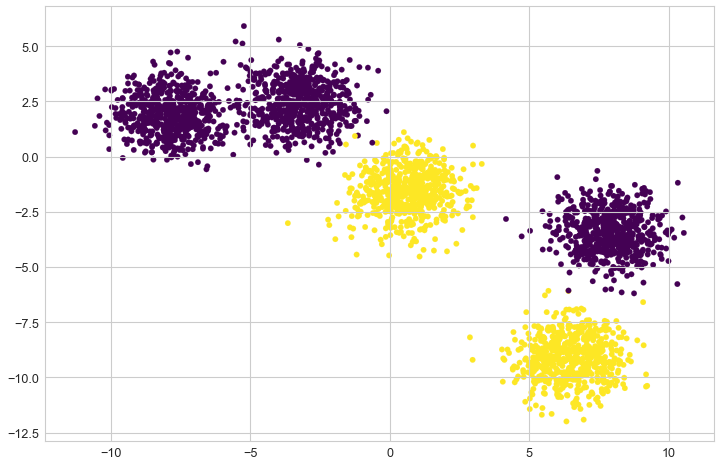

In [4]:
plt.scatter(x = X[:,0], y = X[:,1], c = y)

## Complex Valued Linear Classification

In [5]:
clc = ComplexLinearClassification(alpha = 0.005, n_iter=10000)

clc.fit(X, y)

  6%|████▉                                                                         | 633/10000 [03:27<50:49,  3.07it/s]C:\ubuntu20.04\projects\complex_machine_learning\linear_classification.py:83: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*z.imag/z.real))
100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [43:44<00:00,  3.81it/s]


In [6]:
print(f"Loss: {clc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y == clc.predict(X))/len(y)}")

Loss: 0.004470663748780623
Percentage mapped correctly: 0.9943333333333333


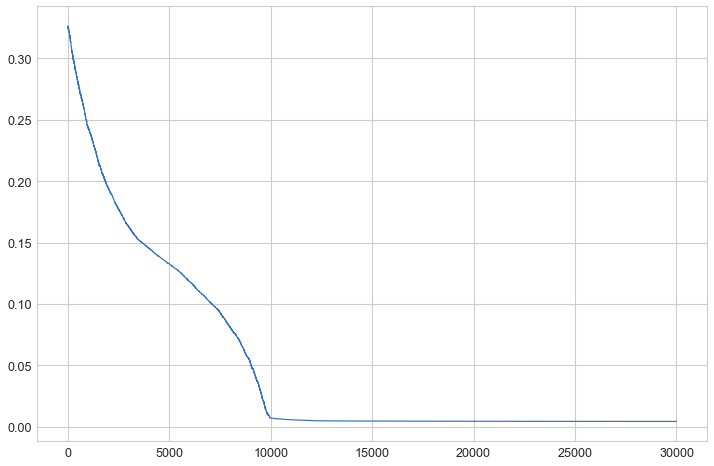

In [7]:
# Plot loss
plt.plot(clc.loss)

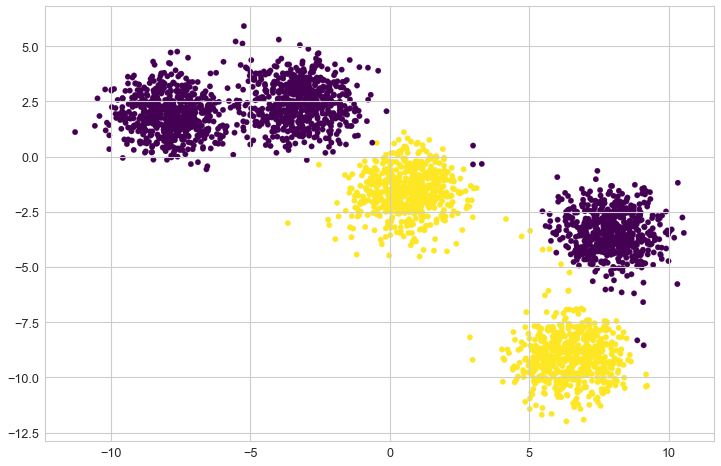

In [19]:
plt.scatter(x = X[:,0], y = X[:,1], c = clc.predict(X))

0 dimension path, with step count.


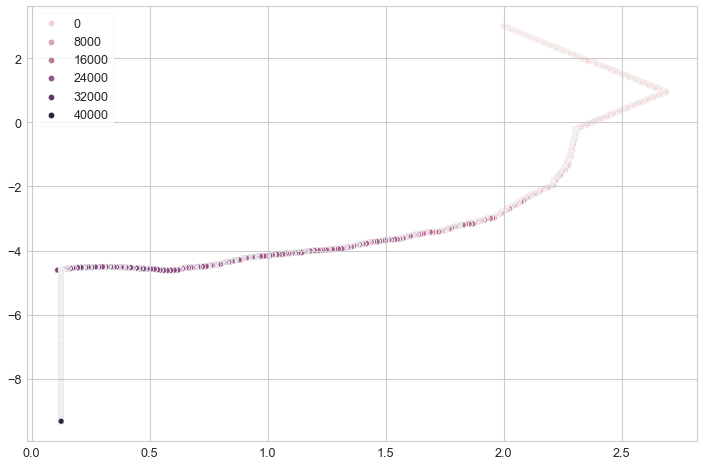


1 dimension path, with step count.


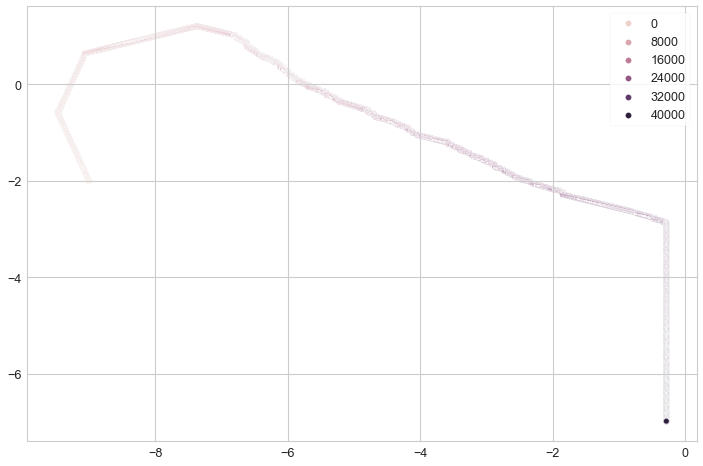


2 dimension path, with step count.


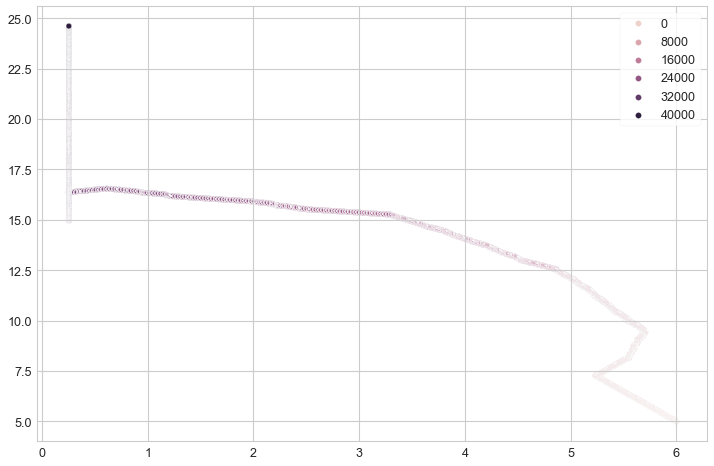

In [8]:
# Plot gradient path of variables
history = clc.weights_history
for j in range(history[0].shape[0]):
    print(f"{j} dimension path, with step count.")
    sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
    plt.show()
    print("")

## Real Valued Linear Classification

In [9]:
lc = LinearClassification(alpha = 0.005, n_iter=10000)

lc.fit(X, y)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [11:08<00:00, 14.95it/s]


In [10]:
print(f"Loss: {lc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y == lc.predict(X))/len(y)}")

Loss: 0.12446735464341394
Percentage mapped correctly: 0.8136666666666666


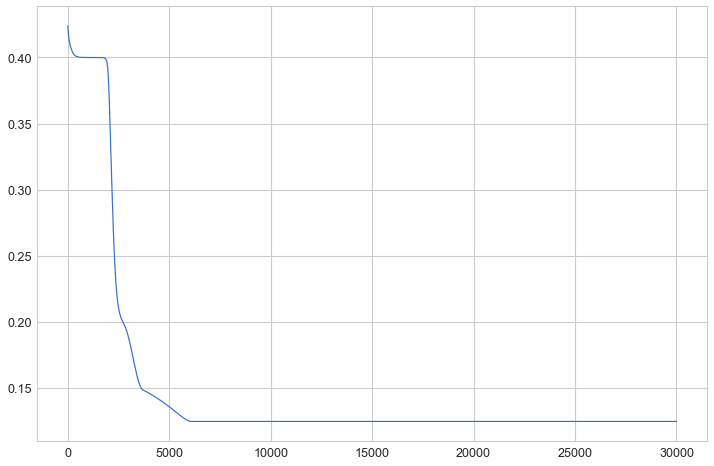

In [11]:
# Plot loss
plt.plot(lc.loss)

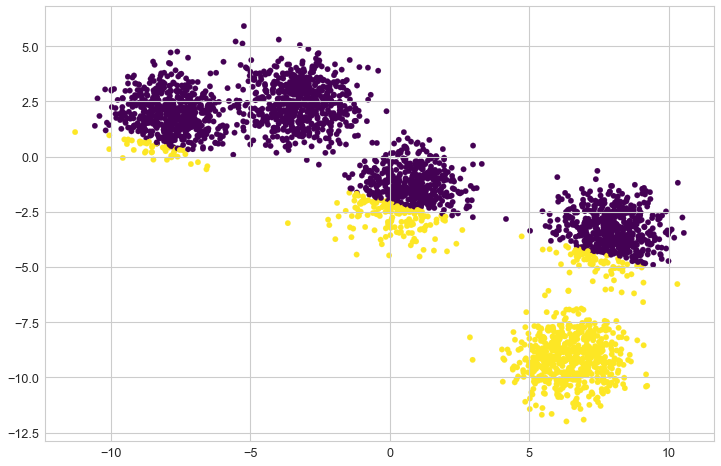

In [18]:
plt.scatter(x = X[:,0], y = X[:,1], c = lc.predict(X))

0 dimension path, with step count.


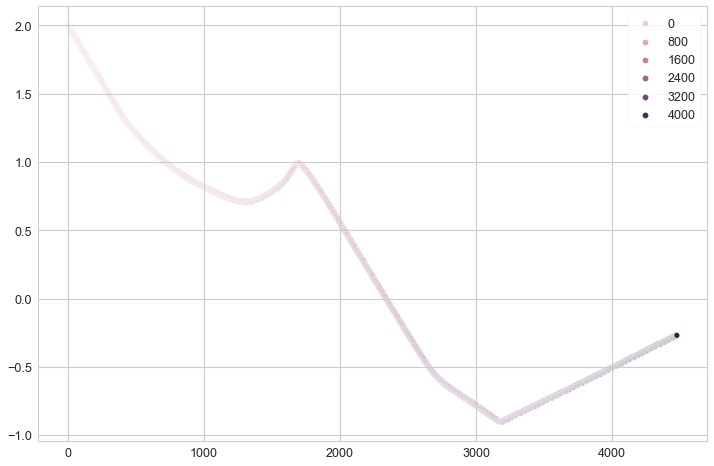


1 dimension path, with step count.


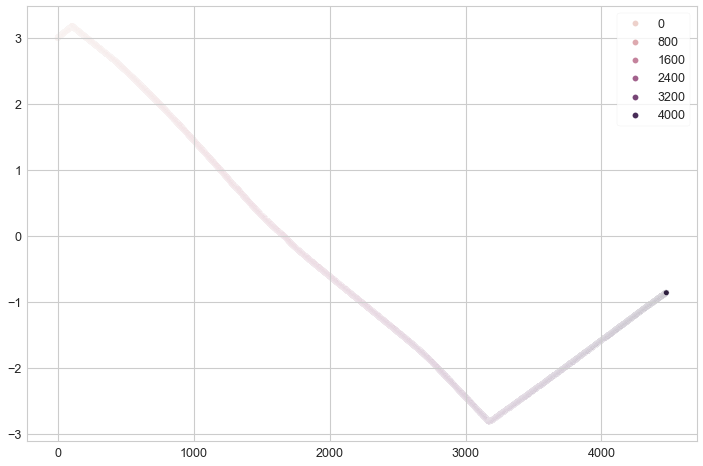


2 dimension path, with step count.


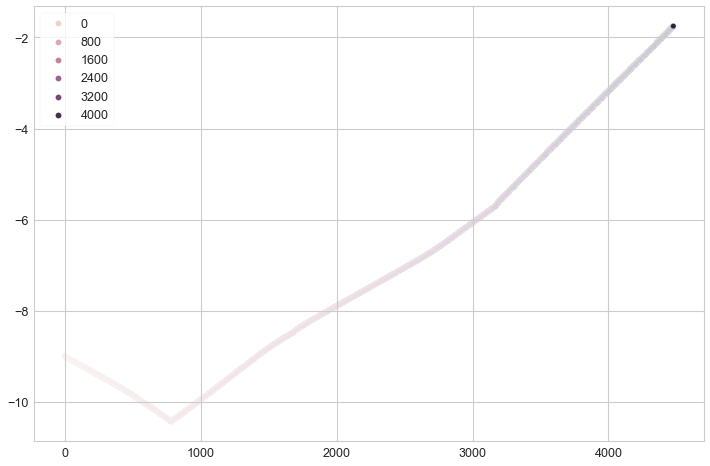

In [12]:
# Plot gradient path of variables
history = lc.weights_history
for j in range(history[0].shape[0]):
    print(f"{j} dimension path, with step count.")
    sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
    plt.show()
    print("")

## Sklearn Logestic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_r = LogisticRegression()

log_r.fit(X, y)

LogisticRegression()

In [15]:
print(f"Loss: {clc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y == log_r.predict(X))/len(y)}")

Loss: 0.004470663748780623
Percentage mapped correctly: 0.8106666666666666


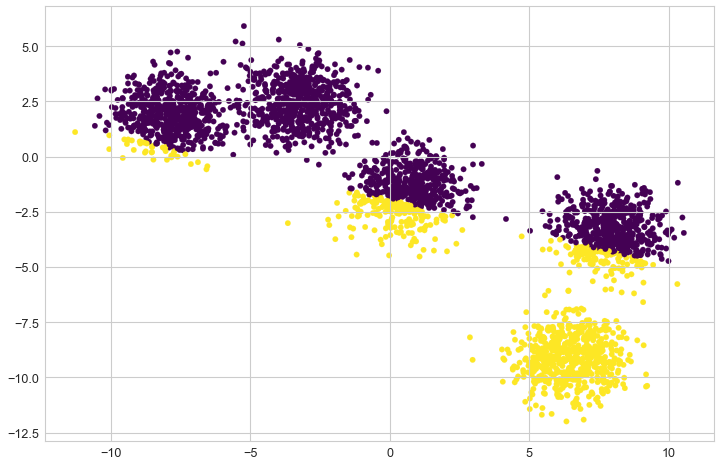

In [17]:
plt.scatter(x = X[:,0], y = X[:,1], c = log_r.predict(X))